<a href="https://colab.research.google.com/github/AdeepKrishnaKeelar/ML-Trails/blob/master/CNN_Image_Classification_Dog_Cat_Identification_Trail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from sklearn.model_selection import KFold
from google.colab import drive
import matplotlib.pyplot as plt
import random

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
x_train = np.loadtxt('/content/drive/MyDrive/Data/input.csv', delimiter=',')
y_train = np.loadtxt('/content/drive/MyDrive/Data/labels.csv', delimiter=',')


kfold= KFold(n_splits=10,shuffle= True, random_state =42)
cvscores =[]




x_test = np.loadtxt('/content/drive/MyDrive/Data/input_test.csv',delimiter=',')
y_test = np.loadtxt('/content/drive/MyDrive/Data/labels_test.csv',delimiter=',')

In [5]:
x_train = x_train.reshape(len(x_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)

x_test = x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

x_train = x_train/255.0
x_test = x_test/255.0

In [6]:
print("Shape of X_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of y_train:  (2000, 1)
Shape of x_test:  (400, 100, 100, 3)
Shape of y_test:  (400, 1)


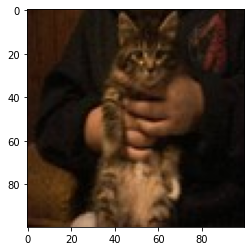

In [7]:
idx = random.randint(0,len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

In [ ]:
# for train , test in kfold.split(x_train, y_train):

In [8]:
for train , test in kfold.split(x_train, y_train):
  model = Sequential([
                      Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
                      MaxPooling2D((2,2)),
                      Conv2D(32,(3,3),activation='relu'),
                      MaxPooling2D((2,2)),
                      Flatten(),
                      Dense(64,activation='relu'),
                      Dense(1,activation='sigmoid')
  ])
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  model.fit(x_train[train],y_train[train],epochs=8,batch_size=64)
  scores = model.evaluate(x_train[test], y_train[test], verbose =0)
  print("%s: %.2f%%"%(model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1]*100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/8
29/29 [==============================] - 20s 644ms/step - loss: 0.6968 - accuracy: 0.5272
Epoch 2/8
29/29 [==============================] - 18s 606ms/step - loss: 0.6381 - accuracy: 0.6117
Epoch 3/8
29/29 [==============================] - 18s 607ms/step - loss: 0.5853 - accuracy: 0.6911
Epoch 4/8
29/29 [==============================] - 18s 604ms/step - loss: 0.5193 - accuracy: 0.7400
Epoch 5/8
29/29 [==============================] - 18s 607ms/step - loss: 0.4422 - accuracy: 0.7983
Epoch 6/8
29/29 [==============================] - 18s 610ms/step - loss: 0.3739 - accuracy: 0.8367
Epoch 7/8
29/29 [==============================] - 18s 608ms/step - loss: 0.3530 - accuracy: 0.8478
Epoch 8/8
29/29 [==============================] - 18s 611ms/step - loss: 0.2789 - accuracy: 0.8767
accuracy: 69.00%
Epoch 1/8
29/29 [==============================] - 18s 601ms/step - loss: 0.7353 - accuracy: 0.4989
Epoch 2/8
29/29 [==============================] - 17s 601ms/step - loss: 0.6553 - 

In [9]:
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
# model.fit(x_train,y_train,epochs=8,batch_size=64)

In [11]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 1s 88ms/step - loss: 0.5545 - accuracy: 0.7150


[0.5545195937156677, 0.7149999737739563]

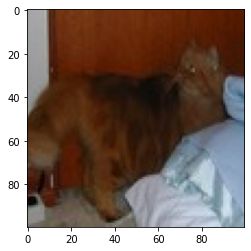

Our model says it is a : cat


In [19]:
idx2 = random.randint(0,len(y_test))
plt.imshow(x_test[idx2,:])
plt.show()
y_pred=model.predict(x_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred>0.5
if(y_pred==0):
  pred = 'dog'
else:
  pred = 'cat'
print("Our model says it is a :",pred)